In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# Specify the URL from which to fetch the HTML data
url = "https://ceypetco.gov.lk/historical-prices/"  # Replace with the actual URL
output_file_name = "./output_1.csv"

In [4]:
# Fetch the HTML content from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_data = response.text
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    exit()


In [5]:

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table in the HTML
table = soup.find('table', {'class': 'ea-advanced-data-table'})

# Extract the table headers
headers = [header.get_text(strip=True) for header in table.find_all('th')]

# Replace the first header with "Date"
if headers:
    headers[0] = "Date"
 
# Extract table rows
rows = []
for row in table.find('tbody').find_all('tr'):
    columns = [col.get_text(strip=True) for col in row.find_all('td')]
    # trip to get first 10 characters in column 0
    columns[0] = columns[0][:10]
    #  05.09.2024 convert this value to 2024-09-05
    columns[0] = columns[0][6:] + "-" + columns[0][3:5] + "-" + columns[0][:2]

    # convert all other colum values as numbers


    for i in range(1, len(columns)):

        # if value like 137.00.00 split by . and remote last part 
        parts = columns[i].split(".")
        if len(parts) > 1:
            columns[i] = parts[0]+ "." + parts[1]
        if columns[i] == "":
            columns[i] = 0
        columns[i] = float(columns[i])
    rows.append(columns)

In [6]:
# Create a pandas DataFrame
df = pd.DataFrame(rows, columns=headers)


# print records count
print(f"Total records: {len(df)}")

# print last 5 records
print(df.tail())
df.head()


Total records: 154
           Date  LP 95  LP 92   LAD   LSD    LK   LIK  FUR. 800  \
149  1991-01-01   32.5   30.0  11.0  13.0  8.80  9.85      6.25   
150  1990-12-26   32.5   30.0  11.0  13.0  8.80  9.85      6.30   
151  1990-11-05   38.0   35.0  13.0  15.0  8.80  9.58      6.30   
152  1990-08-14   27.0   25.0  11.0  12.5  8.00  9.85      5.40   
153  1990-03-01   22.0   20.0   9.6  10.9  6.58  9.85      4.70   

     FUR 1500 (High)  FUR. 1500 (Low)  
149              0.0             5.55  
150              0.0             5.60  
151              0.0             5.60  
152              0.0             4.90  
153              0.0             4.29  


,Date,LP 95,LP 92,LAD,LSD,LK,LIK,FUR. 800,FUR 1500 (High),FUR. 1500 (Low)
0,2024-09-05,377.0,332.0,307.0,352.0,202.0,210.0,199.0,199.0,199.0
1,2024-07-15,377.0,332.0,307.0,352.0,202.0,219.0,199.0,199.0,199.0
2,2024-09-01,377.0,332.0,307.0,352.0,202.0,210.0,204.0,204.0,204.0
3,2024-07-01,379.0,344.0,317.0,355.0,202.0,210.0,204.0,204.0,204.0
4,2024-06-05,420.0,355.0,317.0,377.0,202.0,210.0,204.0,204.0,204.0


In [7]:
# print colum names
print(df.columns)

Index(['Date', 'LP 95', 'LP 92', 'LAD', 'LSD', 'LK', 'LIK', 'FUR. 800',
       'FUR 1500 (High)', 'FUR. 1500 (Low)'],
      dtype='object')


In [8]:


# Save data in csv file
df.to_csv(output_file_name, index=False)
print(f"Data saved in {output_file_name}")

Data saved in ./output_1.csv


In [9]:
# plot date and LP92 prices
import matplotlib.pyplot as plt

plotdf = df[['Date', 'LP 92','LP 95', 'LAD']].copy()
plotdf['Date'] = pd.to_datetime(plotdf['Date'])

# plot only after 2005
plotdf = plotdf[plotdf['Date'] > '2015-01-01']


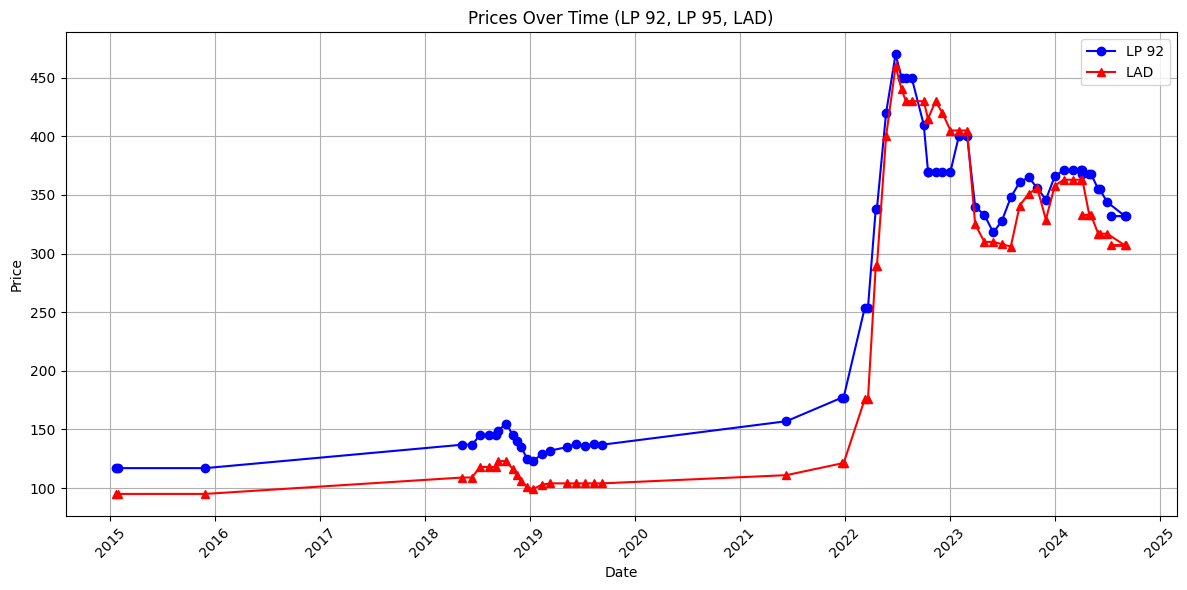

In [10]:



# Remove rows where 'Date', 'LP 92', 'LP 95', or 'LAD' are NaT or NaN
plotdf.dropna(subset=['Date', 'LP 92', 'LP 95', 'LAD'], inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot LP 92
plt.plot(plotdf['Date'], plotdf['LP 92'], marker='o', linestyle='-', color='b', label='LP 92')

# Plot LP 95
# plt.plot(plotdf['Date'], plotdf['LP 95'], marker='s', linestyle='-', color='g', label='LP 95')

# Plot LAD
plt.plot(plotdf['Date'], plotdf['LAD'], marker='^', linestyle='-', color='r', label='LAD')

# Adding plot title and labels
plt.title('Prices Over Time (LP 92, LP 95, LAD)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()